In [ ]:
import pandas as pd

data = pd.read_csv("/content/ss.csv")
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [ ]:
import numpy as np

# Fit linear regression: y = m*x + b
slope, intercept = np.polyfit(data['Sleep Duration'], data['Stress Level'], 1)

print(f"Intercept: {intercept}")
print(f"Slope: {slope}")


Intercept: 18.268565346783394
Slope: -1.806180150547215


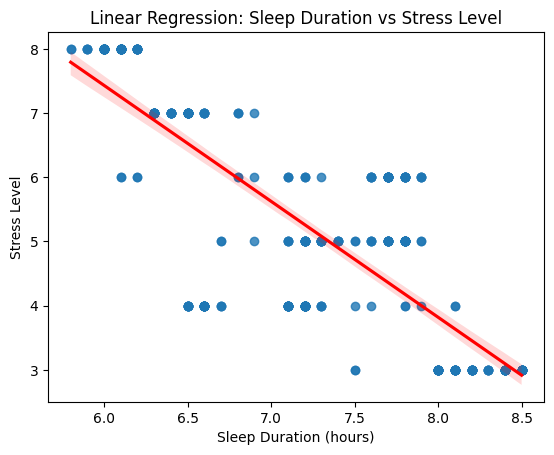

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Plot regression line
sns.regplot(x='Sleep Duration', y='Stress Level', data=data, line_kws={"color": "red"})

plt.title('Linear Regression: Sleep Duration vs Stress Level')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Stress Level')
plt.show()


In [ ]:
import statsmodels.api as sm

# Define multiple independent variables (features)
X = data[['Sleep Duration', 'Physical Activity Level', 'Daily Steps']]
y = data['Stress Level']  # Target variable

# Add constant (intercept term)
X = sm.add_constant(X)

# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# Get coefficients
print("\nIntercept:", model.params['const'])
print("Coefficients:")
print(model.params.drop('const'))



Intercept: 17.245688382750995
Coefficients:
Sleep Duration            -1.819669
Physical Activity Level    0.004317
Daily Steps                0.000127
dtype: float64


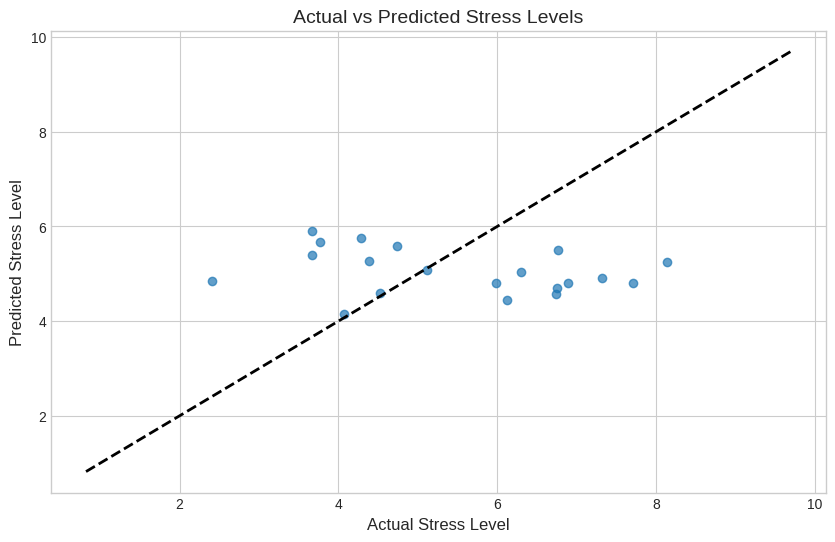

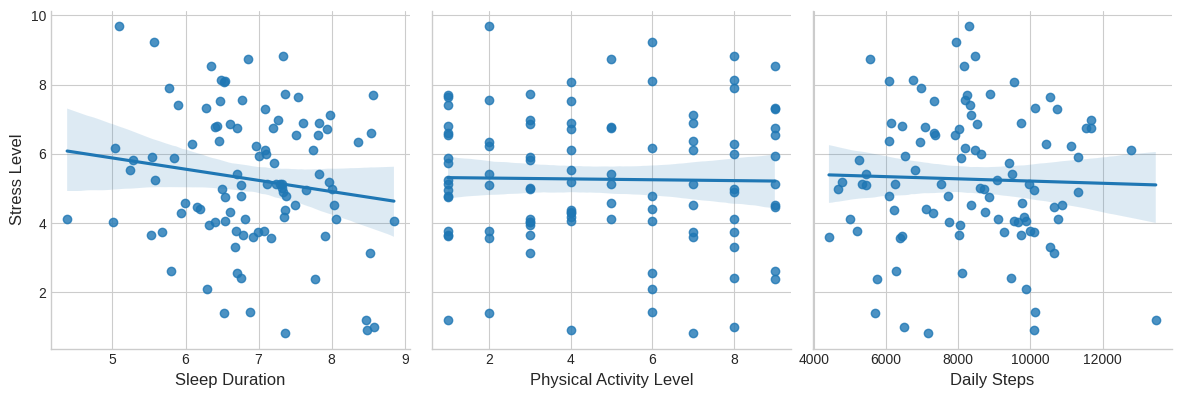

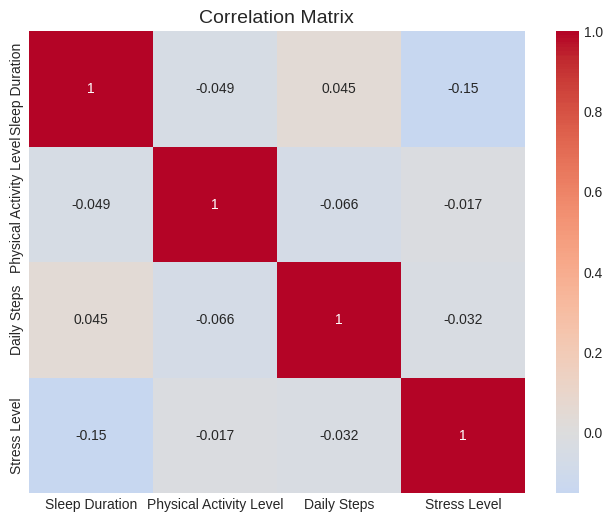

Intercept: 9.301406559591275
Coefficients of Sleep Duration: -0.4131
Coefficients of Physical Activity Level: -0.0816
Coefficients of Daily Steps: -0.0001


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have a DataFrame called 'data' with these columns
# Let's create some sample data if you don't have it
np.random.seed(42)
data = pd.DataFrame({
    'Sleep Duration': np.random.normal(7, 1, 100),
    'Physical Activity Level': np.random.randint(1, 10, 100),
    'Daily Steps': np.random.normal(8000, 2000, 100),
    'Stress Level': np.random.normal(5, 2, 100)  # This would be your y/target
})

# Prepare the data
X = data[['Sleep Duration', 'Physical Activity Level', 'Daily Steps']]
y = data['Stress Level']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual Stress Level')
plt.ylabel('Predicted Stress Level')
plt.title('Actual vs Predicted Stress Levels')
plt.show()

# Pairplots to visualize relationships
sns.pairplot(data, x_vars=['Sleep Duration', 'Physical Activity Level', 'Daily Steps'],
             y_vars=['Stress Level'], kind='reg', height=4)
plt.show()

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

# After fitting the model (model.fit(X_train, y_train)):
# Evaluate the model
print("Intercept:", model.intercept_)
for feature, coef in zip(X.columns, model.coef_):
    print(f"Coefficients of {feature}: {coef:.4f}")